In [1]:
from typing import TypedDict, List
from langgraph.graph import StateGraph
import math

In [2]:
class AgentState(TypedDict):
    values: List[int]
    name: str
    result: str
    operator: str

In [3]:
def process_values(state: AgentState) -> AgentState:
    """This function handles multiple different inputs"""
    
    if state.get("operator") == "+":
        result = sum(state["values"])
    elif state.get("operator") == "*":
        result = math.prod(state["values"])
    else:
        result = "Invalid operator"
    
    state["result"] = f"Hi {state['name']}! Your answer is:  {result}"
    return state

In [4]:
graph = StateGraph(AgentState)

graph.add_node("processor", process_values)
graph.set_entry_point("processor") # Set the starting node
graph.set_finish_point("processor") # Set the ending node

app = graph.compile() # Cimpiling the graph

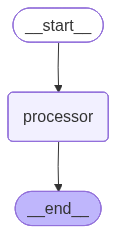

In [5]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [6]:
answers = app.invoke({"values": [1,2,3,4], "name": "Jack Sparrow", "operator": "*"})
print(answers)

{'values': [1, 2, 3, 4], 'name': 'Jack Sparrow', 'result': 'Hi Jack Sparrow! Your answer is:  24', 'operator': '*'}


In [7]:
print(answers["result"])

Hi Jack Sparrow! Your answer is:  24


In [8]:
from typing import TypedDict, List
from langgraph.graph import StateGraph
import operator
from functools import reduce

# Define the state type
class AgentState(TypedDict):
    values: List[int]
    name: str
    result: str
    operator: str

# Define operator mapping
operator_funcs = {
    "+": sum,
    "*": lambda vals: reduce(operator.mul, vals, 1),
    "-": lambda vals: reduce(operator.sub, vals),
    "/": lambda vals: reduce(operator.truediv, vals)
}

# Processing function
def process_values(state: AgentState) -> AgentState:
    """Handles different operators dynamically"""
    
    op = state.get("operator")
    values = state["values"]

    if op in operator_funcs:
        result = operator_funcs[op](values)
    else:
        result = "Invalid operator"

    state["result"] = f"Hi {state['name']}! Your answer is: {result}"
    return state

# Create the graph
graph = StateGraph(AgentState)
graph.add_node("processor", process_values)
graph.set_entry_point("processor")
graph.set_finish_point("processor")
app = graph.compile()

# Test the app
answers = app.invoke({
    "values": [2, 3, 4],
    "name": "Jack Sparrow",
    "operator": "*"
})
print(answers["result"])  # Hi Jack Sparrow! Your answer is: 24

# Another example with +
answers = app.invoke({
    "values": [2, 3, 4],
    "name": "Jack Sparrow",
    "operator": "+"
})
print(answers["result"])  # Hi Jack Sparrow! Your answer is: 9



Hi Jack Sparrow! Your answer is: 24
Hi Jack Sparrow! Your answer is: 9
